# Temporal Demand Anlaysis

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

## Hourly Demand Analysis

In [3]:
h = pd.read_parquet('hourly_summary_ready.parquet')

In [6]:
h.head(2)

,hour,total_trips,avg_distance,avg_trip_duration_min,avg_speed_mph,total_revenue,revenue_per_trip,revenue_per_mile,revenue_per_minute
0,12 AM,906085,3.953933,14.814035,16.014271,27206378.03,30.026298,7.594033,2.026882
1,01 AM,586182,3.462436,13.637324,15.233647,15967830.54,27.240397,7.867408,1.997489


In [26]:
# Total Trips between 12 AM and 12 PM
hr_of_max_trips = h.loc[h['total_trips'].idxmax(), 'hour']
hr_of_max_trips

'06 PM'

##### Documentation: '06 PM' is the hour with the maximum number of trips.

In [38]:
peak_revenue_hr = h.loc[h['total_revenue'].idxmax(), 'hour']
peak_revenue_hr

'05 PM'

In [42]:
top3_revenue_hours = h.sort_values(by=['total_revenue'], ascending=False).head(4)
print(top3_revenue_hours[['hour', 'total_revenue']])

     hour  total_revenue
17  05 PM    73316914.63
18  06 PM    71590205.63
16  04 PM    71052796.68
15  03 PM    65060563.70


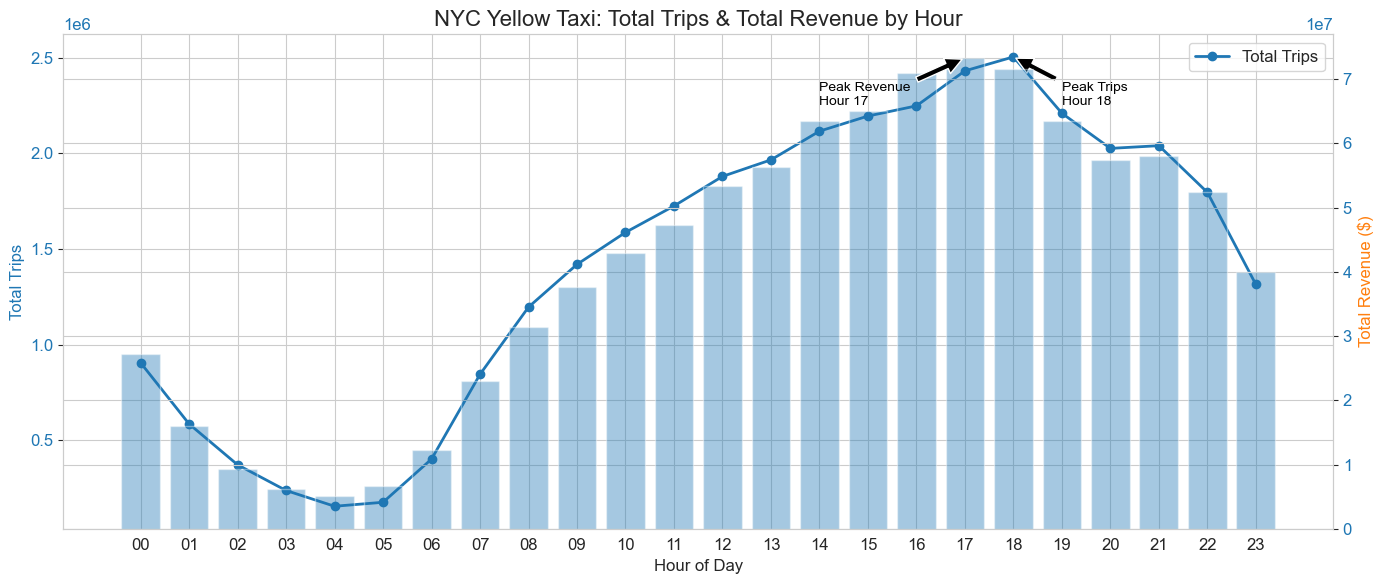

In [87]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14,6)
plt.rcParams['font.size'] = 12

peak_trips_hour = int(h['total_trips'].idxmax())
peak_trips_value = float(h['total_trips'].max())

peak_revenue_hour = int(h['total_revenue'].idxmax())
peak_revenue_value = float(h['total_revenue'].max())


fig, ax1 = plt.subplots()

# Total Trips vs Hour
ax1.plot(h['hour'], h['total_trips'], color='tab:blue', marker='o', linewidth=2, label='Total Trips')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Total Trips', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticks(range(0,24))
ax1.set_xticklabels([f'{hr:02d}' for hr in range(24)])

# Highlighting peak trips hour
ax1.annotate(f'Peak Trips\nHour {peak_trips_hour}',
            xy=(peak_trips_hour, peak_trips_value),
            xytext=(peak_trips_hour+1, peak_trips_value*0.9),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=10,
            color='black'
)

# Total Revenue vs Hour (Bar Chart)
ax2 = ax1.twinx()
ax2.bar(h['hour'], h['total_revenue'], color='tab:blue', alpha=0.4, label='Total Revenue')
ax2.set_ylabel('Total Revenue ($)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Highlighting peak revenue hour
ax2.annotate(f'Peak Revenue\nHour {peak_revenue_hour}',
            xy=(peak_revenue_hour, h['total_revenue'].max()),
            xytext=(peak_revenue_hour-3, h['total_revenue'].max()*0.9),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=10,
            color='black'
            )


# Customizations: (Title and Legends)
plt.title('NYC Yellow Taxi: Total Trips & Total Revenue by Hour', fontsize=16)
fig.tight_layout()
ax1.legend(loc='upper left')
ax1.legend(loc='upper right')
plt.show()

# Dcoumentation: (Total Trips & Total Revenue vs Hour)

This visualization presents a dual-axis chart comparing total trips and total revenue across the 24 hours of the day.
    * The line plot (left y-axis) represents total trips, capturing hourly passenger
      demand.
    * The bar plot (right y-axis) represents total revenue generated per hour.
    * Peak hours for both metrics are annotated to highlight operational and financial
      insights.

This combined view enables simultaneous evaluation of demand intensity and revenue performance throughout the day.

Key Findings:
1. Peak Trips Hour
   * Occurs at 18:00 (6 PM).
   * This hour records the highest passenger demand.
   * The sharp increase leading into 18:00 reflects typical evening rush-hour
     activiy,followed by a gradual decline afterward.
     
This suggests that commuter traffic strongly influences taxi demand during early evening hours.

## Interpretation & Business Insight

The one-hour offset between peak demand and peak revenue is operationally significant.
   ### At 17:00, fewer trips generate higher total revenue, suggesting:
   ##### * Longer average trip distances
   ##### * Higher traffic-based fare accumulation
   ##### * Potential dynamic pricing or surge conditions
   
   ###  At 18:00, trip volume is highest, but:
   ##### * Average revenue per trip appears lower
   ##### * Trips may be shorter (e.g., local commutes)

## Operational Implication:

### Taxi operators may maximize earnings by:
##### Positioning vehicles strategically before 17:00
##### Targeting high-value routes during late afternoon
##### Monitoring fare efficiency (revenue per trip), not just trip volume

In [67]:
type(h)

pandas.core.frame.DataFrame

In [68]:
h['total_trips'] = h['total_trips'].astype('float')
h['total_revenue'] = h['total_revenue'].astype('float')

In [92]:
d = pd.read_parquet('daily_summary_ready.parquet')

In [93]:
d.head(2)

,date,total_trips,total_revenue,revenue_per_trip,avg_distance,avg_trip_duration_min,revenue_per_mile,revenue_per_minute,avg_speed_mph,pct_trips,pct_revenue,day_of_week,day_of_year
0,2024-12-01,83203,2599639.59,31.244542,4.129789,17.503925,7.565651,1.785002,14.156101,0.242335,0.262441,6,336
1,2024-12-02,98793,3113766.80,31.518091,3.819319,19.112268,8.252280,1.649103,11.990159,0.287743,0.314344,0,337


In [94]:
d.shape

(365, 13)

In [95]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   365 non-null    datetime64[ns]
 1   total_trips            365 non-null    int64         
 2   total_revenue          365 non-null    float64       
 3   revenue_per_trip       365 non-null    float64       
 4   avg_distance           365 non-null    float64       
 5   avg_trip_duration_min  365 non-null    float64       
 6   revenue_per_mile       365 non-null    float64       
 7   revenue_per_minute     365 non-null    float64       
 8   avg_speed_mph          365 non-null    float64       
 9   pct_trips              365 non-null    float64       
 10  pct_revenue            365 non-null    float64       
 11  day_of_week            365 non-null    int32         
 12  day_of_year            365 non-null    int32         
dtypes: da

In [96]:
d.describe()

,date,total_trips,total_revenue,revenue_per_trip,avg_distance,avg_trip_duration_min,revenue_per_mile,revenue_per_minute,avg_speed_mph,pct_trips,pct_revenue,day_of_week,day_of_year
count,365,365.000000,3.650000e+02,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2025-06-01 00:00:00,94065.243836,2.713867e+06,28.887107,3.264017,16.505776,8.902732,1.758237,11.950566,0.273973,0.273973,3.008219,183.084932
min,2024-12-01 00:00:00,44159.000000,1.200792e+06,24.248359,2.564282,12.395960,7.098138,1.470474,9.001097,0.128617,0.121223,0.000000,1.000000
25%,2025-03-02 00:00:00,83717.000000,2.429347e+06,27.805479,3.040609,15.450116,8.450342,1.682635,10.871216,0.243833,0.245250,1.000000,92.000000
50%,2025-06-01 00:00:00,95823.000000,2.720754e+06,29.003327,3.189297,16.442529,9.001822,1.754109,11.605848,0.279092,0.274668,3.000000,183.000000
75%,2025-08-31 00:00:00,104653.000000,3.001021e+06,29.951582,3.446978,17.461920,9.372848,1.812803,12.762211,0.304810,0.302962,5.000000,274.000000
max,2025-11-30 00:00:00,135196.000000,4.205382e+06,43.171409,4.742519,21.153601,10.800632,3.089705,17.741912,0.393769,0.424545,6.000000,366.000000
std,NaN,14578.097625,4.338308e+05,1.748592,0.337594,1.451845,0.635943,0.131732,1.591333,0.042460,0.043796,2.006155,105.645743


In [101]:
# Days of the week in daily dataframe

# Monday - 0
# Tuesday - 1
# Wednesday - 2
# Thursday - 3
# Friday - 4
# Saturday - 5
# Sunday - 6

# 5 - 6 are Weekends
# 0 - 4 are Weekdays

In [102]:
d['day_type'] = np.where(d['day_of_week'] < 5, 'Weekday', 'Weekend')

In [103]:
d

,date,total_trips,total_revenue,revenue_per_trip,avg_distance,avg_trip_duration_min,revenue_per_mile,revenue_per_minute,avg_speed_mph,pct_trips,pct_revenue,day_of_week,day_of_year,day_type
0,2024-12-01,83203,2599639.59,31.244542,4.129789,17.503925,7.565651,1.785002,14.156101,0.242335,0.262441,6,336,Weekend
1,2024-12-02,98793,3113766.80,31.518091,3.819319,19.112268,8.252280,1.649103,11.990159,0.287743,0.314344,0,337,Weekday
2,2024-12-03,114301,3450449.95,30.187399,3.332373,18.832153,9.058829,1.602971,10.617076,0.332911,0.348333,1,338,Weekday
3,2024-12-04,117696,3543545.29,30.107610,3.188386,19.301463,9.442899,1.559862,9.911330,0.342799,0.357731,2,339,Weekday
4,2024-12-05,128789,3919818.75,30.435975,3.212644,20.051796,9.473808,1.517868,9.613036,0.375108,0.395717,3,340,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2025-11-26,84161,2401797.51,28.538129,2.948132,17.117767,9.680073,1.667164,10.333584,0.245126,0.242468,2,330,Weekday
361,2025-11-27,55420,1455818.81,26.268835,3.170484,13.677725,8.285435,1.920556,13.907942,0.161415,0.146969,3,331,Weekday
362,2025-11-28,71584,2031466.39,28.378777,3.165985,15.204803,8.963649,1.866435,12.493360,0.208494,0.205082,4,332,Weekday
363,2025-11-29,81290,2439054.06,30.004356,3.571083,16.907393,8.402032,1.774629,12.672857,0.236764,0.246229,5,333,Weekend


In [106]:
trips_by_type = (
    d.groupby('day_type')['total_trips'].sum().reset_index()
)
trips_by_type

,day_type,total_trips
0,Weekday,25010514
1,Weekend,9323300


In [105]:
d

,date,total_trips,total_revenue,revenue_per_trip,avg_distance,avg_trip_duration_min,revenue_per_mile,revenue_per_minute,avg_speed_mph,pct_trips,pct_revenue,day_of_week,day_of_year,day_type
0,2024-12-01,83203,2599639.59,31.244542,4.129789,17.503925,7.565651,1.785002,14.156101,0.242335,0.262441,6,336,Weekend
1,2024-12-02,98793,3113766.80,31.518091,3.819319,19.112268,8.252280,1.649103,11.990159,0.287743,0.314344,0,337,Weekday
2,2024-12-03,114301,3450449.95,30.187399,3.332373,18.832153,9.058829,1.602971,10.617076,0.332911,0.348333,1,338,Weekday
3,2024-12-04,117696,3543545.29,30.107610,3.188386,19.301463,9.442899,1.559862,9.911330,0.342799,0.357731,2,339,Weekday
4,2024-12-05,128789,3919818.75,30.435975,3.212644,20.051796,9.473808,1.517868,9.613036,0.375108,0.395717,3,340,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2025-11-26,84161,2401797.51,28.538129,2.948132,17.117767,9.680073,1.667164,10.333584,0.245126,0.242468,2,330,Weekday
361,2025-11-27,55420,1455818.81,26.268835,3.170484,13.677725,8.285435,1.920556,13.907942,0.161415,0.146969,3,331,Weekday
362,2025-11-28,71584,2031466.39,28.378777,3.165985,15.204803,8.963649,1.866435,12.493360,0.208494,0.205082,4,332,Weekday
363,2025-11-29,81290,2439054.06,30.004356,3.571083,16.907393,8.402032,1.774629,12.672857,0.236764,0.246229,5,333,Weekend


In [107]:
# Avg revenue per day (using pct_revenue)
avg_revenue_by_type = (
    d.groupby('day_type')['total_revenue'].mean().reset_index()
)

In [108]:
avg_revenue_by_type

,day_type,total_revenue
0,Weekday,2.803091e+06
1,Weekend,2.492929e+06


In [109]:
# Percentage Contribution of the weekends and weekdays in Total Revenue
pct_summary = (
    d.groupby('day_type')[['pct_trips','pct_revenue']].mean().reset_index()
)

In [110]:
pct_summary

,day_type,pct_trips,pct_revenue
0,Weekday,0.280174,0.282980
1,Weekend,0.258618,0.251668


In [111]:
# Revenue per trip efficiency
d['revenue_per_trip'] = d['total_revenue'] / d['total_trips']

efficiency_by_type = (
    d.groupby('day_type')['revenue_per_trip'].mean().reset_index
)

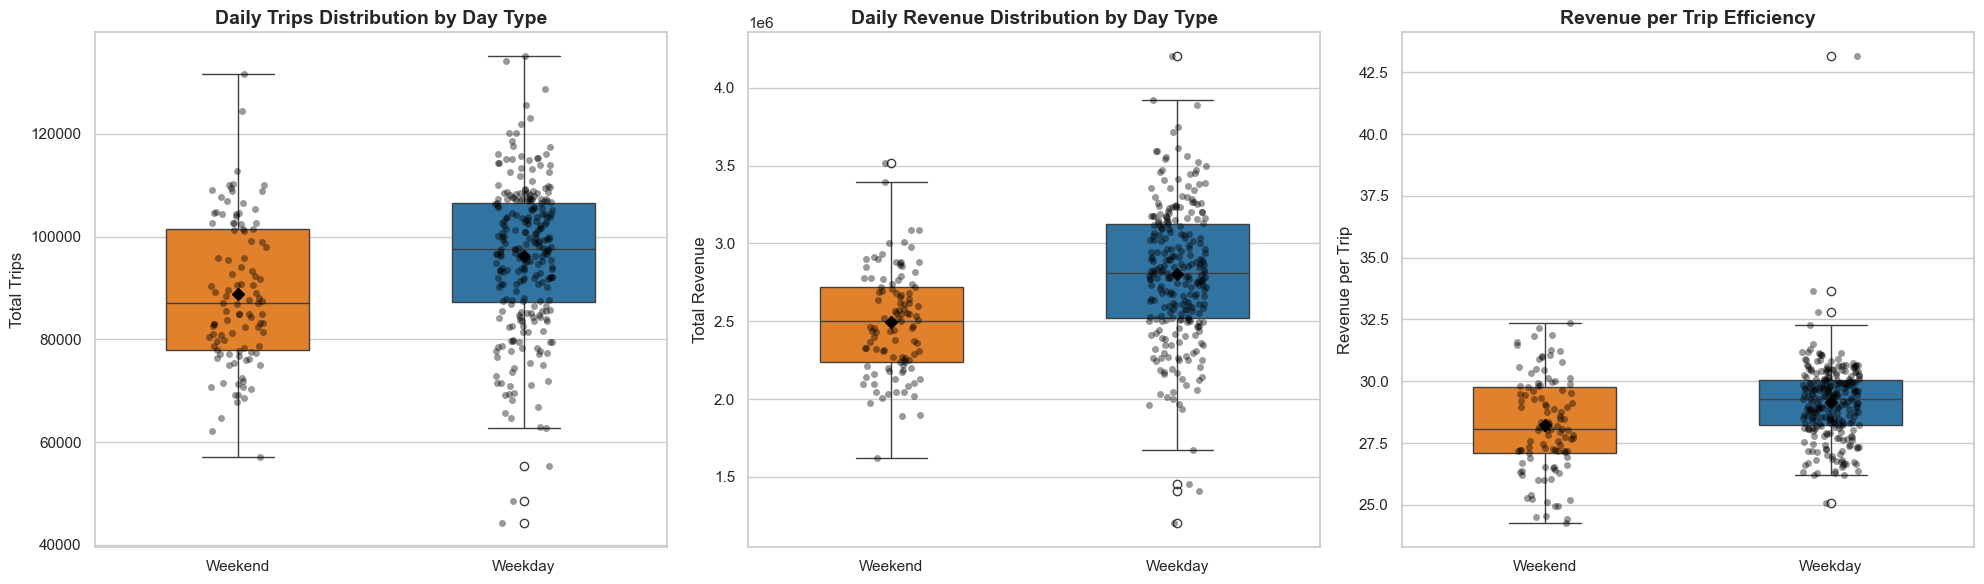

In [124]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(20,6))

palette = {"Weekday": "#1f77b4", "Weekend": "#ff7f0e"}

# Trips Distribution
sns.boxplot(
    data=d,
    x='day_type',
    y='total_trips',
    hue='day_type',
    palette=palette,
    width=0.5,
    showmeans=True,
    meanprops={"marker":"D","markerfacecolor":"black","markeredgecolor":"black"},
    legend=False,
    ax=axes[0]
)

sns.stripplot(
    data=d,
    x='day_type',
    y='total_trips',
    color='black',
    alpha=0.4,
    ax=axes[0]
)

axes[0].set_title("Daily Trips Distribution by Day Type", fontsize=14, fontweight='bold')
axes[0].set_xlabel("")
axes[0].set_ylabel("Total Trips")

# Revenue Distribution
sns.boxplot(
    data=d,
    x='day_type',
    y='total_revenue',
    hue='day_type',
    palette=palette,
    width=0.5,
    showmeans=True,
    meanprops={"marker":"D","markerfacecolor":"black","markeredgecolor":"black"},
    legend=False,
    ax=axes[1]
)

sns.stripplot(
    data=d,
    x='day_type',
    y='total_revenue',
    color='black',
    alpha=0.4,
    ax=axes[1]
)

axes[1].set_title("Daily Revenue Distribution by Day Type", fontsize=14, fontweight='bold')
axes[1].set_xlabel("")
axes[1].set_ylabel("Total Revenue")

#  Revenue Efficiency
sns.boxplot(
    data=d,
    x='day_type',
    y='revenue_per_trip',
    hue='day_type',
    palette=palette,
    width=0.5,
    showmeans=True,
    meanprops={"marker":"D","markerfacecolor":"black","markeredgecolor":"black"},
    legend=False,
    ax=axes[2]
)

sns.stripplot(
    data=d,
    x='day_type',
    y='revenue_per_trip',
    color='black',
    alpha=0.4,
    ax=axes[2]
)

axes[2].set_title("Revenue per Trip Efficiency", fontsize=14, fontweight='bold')
axes[2].set_xlabel("")
axes[2].set_ylabel("Revenue per Trip")

plt.tight_layout()
plt.show()



# Documentation:

## Daily Trips Distribution

 ### Weekdays exhibit a higher median daily trip count compared to weekends.
 ### The interquartile range (IQR) for weekdays is moderately wide, indicating variability       across business days.
 ### Weekend trip volumes are consistently lower but still show substantial dispersion.
 
## Interpretation

 ### Taxi demand is structurally stronger during weekdays, likely driven by:

   #### Commuting behavior
   #### Business travel
   #### Structured workday mobility patterns
   #### Weekends show reduced demand but still maintain strong baseline activity,        suggesting stable leisure-driven usage.




## Daily Revenue Distribution

  ### Weekdays demonstrate both:
  
   #### Higher median revenue
   #### Higher upper-range outliers
   #### Revenue variability appears slightly larger on weekdays.

## Interpretation

   #### Higher weekday revenue aligns with:
   #### Increased trip volume
   #### Potentially longer trip distances (e.g., office commutes, airport routes)
   #### Higher congestion-related fare accumulation
 
   ##### The presence of high-end outliers suggests occasional exceptionally strong revenue days, possibly linked to:

  #### Events
  #### Weather disruptions
  #### Surge-like conditions



## Revenue per Trip (Efficiency Metric)

#### Weekdays show a slightly higher median revenue per trip.
#### Distribution overlap exists, but weekday efficiency appears marginally stronger.
#### Some extreme high-value outliers appear on weekdays.

## Interpretation

### Although both day types generate strong activity:
#### Weekdays are not only higher in demand,
#### They are also marginally more revenue-efficient per trip.

### This suggests:

#### Longer average trip distances
#### More premium routes (e.g., business districts, airports)
#### Possibly higher time-based fare accumulation

##### Weekends, while active, appear slightly less revenue-efficient on a per-trip basis, potentially reflecting:

#### Shorter leisure trips
#### Localized movements
#### Reduced peak congestion impact

#### Total Trips: Weekday vs Weekend

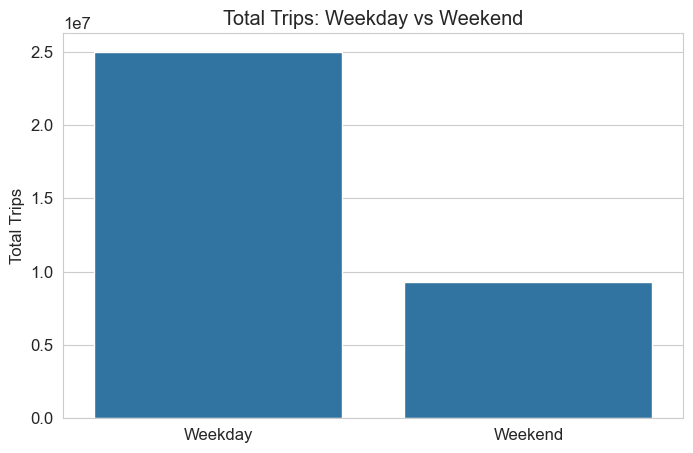

In [114]:
plt.figure(figsize=(8,5))

sns.barplot(
    data=trips_by_type,
    x='day_type',
    y='total_trips'
)
plt.title('Total Trips: Weekday vs Weekend')
plt.ylabel('Total Trips')
plt.xlabel('')
plt.show()

# Documentation:
The bar chart compares the aggregated total number of taxi trips generated during weekdays and weekends.
Key Results:
* Weekdays: ~25.1 Million Trips
* Weekends: ~8.1 Million Trips

Interpretation:
1. Demand Concentration:
Weekdays account for a substantially larger share of total taxi activity, generating more than three times the number of trips observed on weekends.
2. Mobility Pattern Insight:
This disparity strongly suggests that structured weekday mobility - including commuting, business travel, and routing transportation needs - is the primary driver of taxi demand.
3. Operational Implication:
Fleet allocation, driver scheduling, and operation planning should prioritize weekday coverage to align with peak structural demand.

Summary:
Taxi demand is heavily concentrated during weekdays, which generate approximately 25 Million trips compared to 8 Million on weekends, confirming that commuter-driven travel dominates overall system usage.

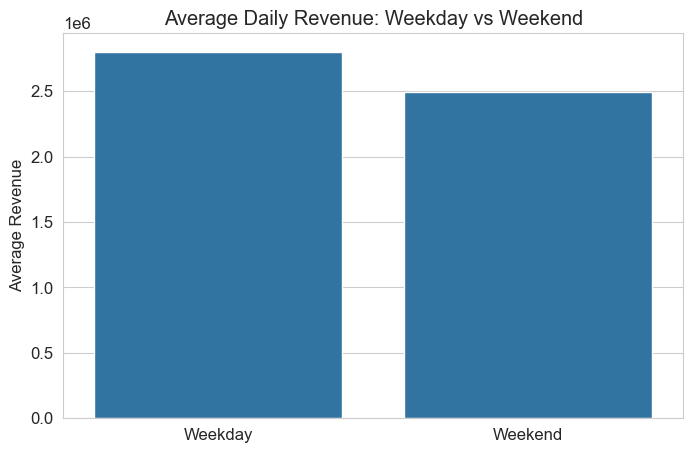

In [115]:
plt.figure(figsize=(8,5))

sns.barplot(
    data=avg_revenue_by_type,
    x='day_type',
    y='total_revenue'
)
plt.title('Average Daily Revenue: Weekday vs Weekend')
plt.ylabel('Average Revenue')
plt.xlabel('')
plt.show()

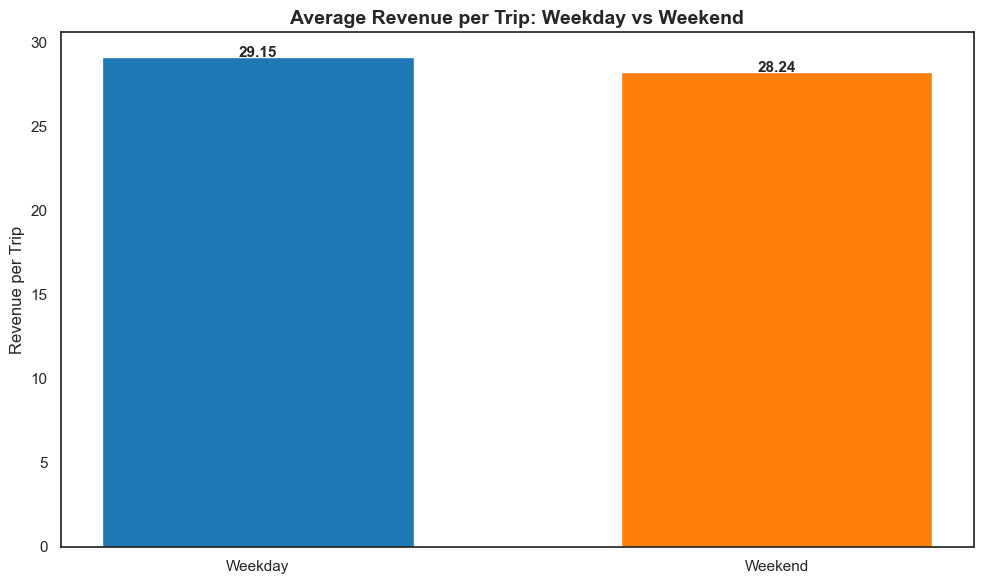

In [134]:
comparison = d.groupby('day_type').agg({
    'total_trips':'mean',
    'total_revenue':'mean',
    'revenue_per_trip':'mean'
}).reset_index()

fig, ax = plt.subplots(figsize=(10,6))

bars = ax.bar(
    comparison['day_type'],
    comparison['revenue_per_trip'],
    color=[palette[x] for x in comparison['day_type']],
    width=0.6
)

ax.set_title('Average Revenue per Trip: Weekday vs Weekend', fontsize=14,
            fontweight='bold')
ax.set_ylabel('Revenue per Trip')
ax.set_xlabel('')

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() /2,
        height,
        f'{height:.2f}',
        ha='center',
        fontsize=11,
        fontweight='bold'
    )
plt.tight_layout()
plt.show()

# Documentation:
This bar chart compares the average daily revenue generated on weekdays vs weekends, providing insight into revenue performance independent of total trip volume.

Key Results:
* Weekday Average Daily Revenue: ~$2.71 Million
* Weekdend Average Daily Revenue: ~$2.51 Million

Interpretation:
1. Higher Weekday Revenue Performance:
weekdays generate approximately $200,000 more per day on average than weekends, indicating stronger daily earning capacity.
2. Revenue Efficiency Signal:
The higher weekday revenue aligns with increased commuter-drive demand and potentiall longer or higher-value trips.
3. Magnitude of Difference:
While the difference is not extreme, it is directionally consistent with earlier findings that weekday operations are marginally more revenue-efficient.

Summary:
Weekdays outperform weekends in average daily revenue, generating roughly $2.81M per day compared to $2.51M on weekends, reinforcing the structural profitability advantage of weekday operations.

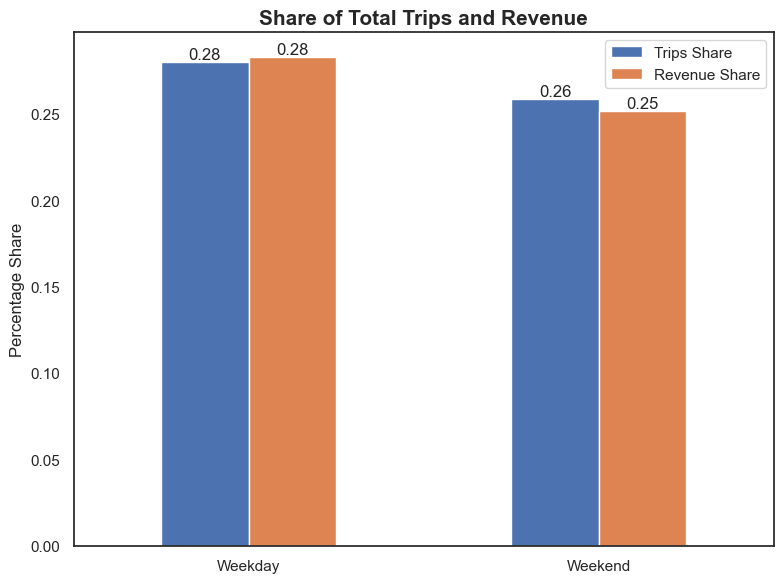

In [133]:
fig, ax = plt.subplots(figsize=(8,6))

pct_summary.set_index('day_type')[['pct_trips','pct_revenue']].plot(
    kind='bar',
    ax=ax,
    color=['#4c72b0','#dd8452']
)

ax.set_title("Share of Total Trips and Revenue",
             fontsize=15, fontweight='bold')

ax.set_ylabel("Percentage Share")
ax.set_xlabel("")
ax.legend(["Trips Share","Revenue Share"])

# Add labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Documentation: 
Weekdays contribute a slightly higher share of reenue relative to their trip share, indicating marginally stronger revenue efficiency. In contrast, weekends generate a slightly higher proportion of trips than revenue, suggesting comparatively lower average earnings per trip.

### Executive Insight:
Weekday operations not only drive a larger portion of total demand but also convert that demand into proportionally higher revenue, reinforcing their structural profitability advantage over weekends.

In [139]:
m = pd.read_parquet('monthly_summary_ready.parquet')

In [144]:
m.describe()

,total_trips,total_revenue,revenue_per_trip,avg_distance,avg_trip_duration_min,revenue_per_mile,revenue_per_min,avg_speed_mph,pct_trips,pct_revenue
count,1.200000e+01,1.200000e+01,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,2.861745e+06,8.254816e+07,28.826534,3.232588,16.567543,8.922886,1.744309,11.741691,8.333333,8.333333
std,2.323926e+05,7.918951e+06,0.994085,0.141399,1.140197,0.220133,0.074503,0.696187,0.676722,0.799427
min,2.417131e+06,6.992152e+07,26.901988,2.981682,14.577733,8.425542,1.581379,10.439415,7.038628,7.058659
25%,2.714250e+06,7.537568e+07,28.248486,3.160083,16.042854,8.805631,1.698618,11.227915,7.903831,7.609263
50%,2.884049e+06,8.426933e+07,29.106987,3.220446,16.630447,8.938978,1.750359,11.825040,8.398282,8.507087
75%,3.039032e+06,8.724015e+07,29.550872,3.326988,17.461724,9.046835,1.793910,12.222534,8.849588,8.806995
max,3.131288e+06,9.265356e+07,29.876120,3.492977,18.348315,9.236175,1.867102,12.849016,9.118236,9.353485


In [145]:
m.shape

(12, 11)

In [146]:
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype    
---  ------                 --------------  -----    
 0   month                  12 non-null     period[M]
 1   total_trips            12 non-null     int64    
 2   total_revenue          12 non-null     float64  
 3   revenue_per_trip       12 non-null     float64  
 4   avg_distance           12 non-null     float64  
 5   avg_trip_duration_min  12 non-null     float64  
 6   revenue_per_mile       12 non-null     float64  
 7   revenue_per_min        12 non-null     float64  
 8   avg_speed_mph          12 non-null     float64  
 9   pct_trips              12 non-null     float64  
 10  pct_revenue            12 non-null     float64  
dtypes: float64(9), int64(1), period[M](1)
memory usage: 1.2 KB


In [147]:
# Calculating Month-over-Month % Changes
m['trips_mom_pct'] = m['total_trips'].pct_change() * 100
m['revenue_mom_pct'] = m['total_revenue'].pct_change() * 100
m['rev_per_trip_mom_pct'] = m['revenue_per_trip'].pct_change() * 100

In [148]:
# Converting 'month' to string for plotting
m['month_str'] = m['month'].dt.strftime('%b')

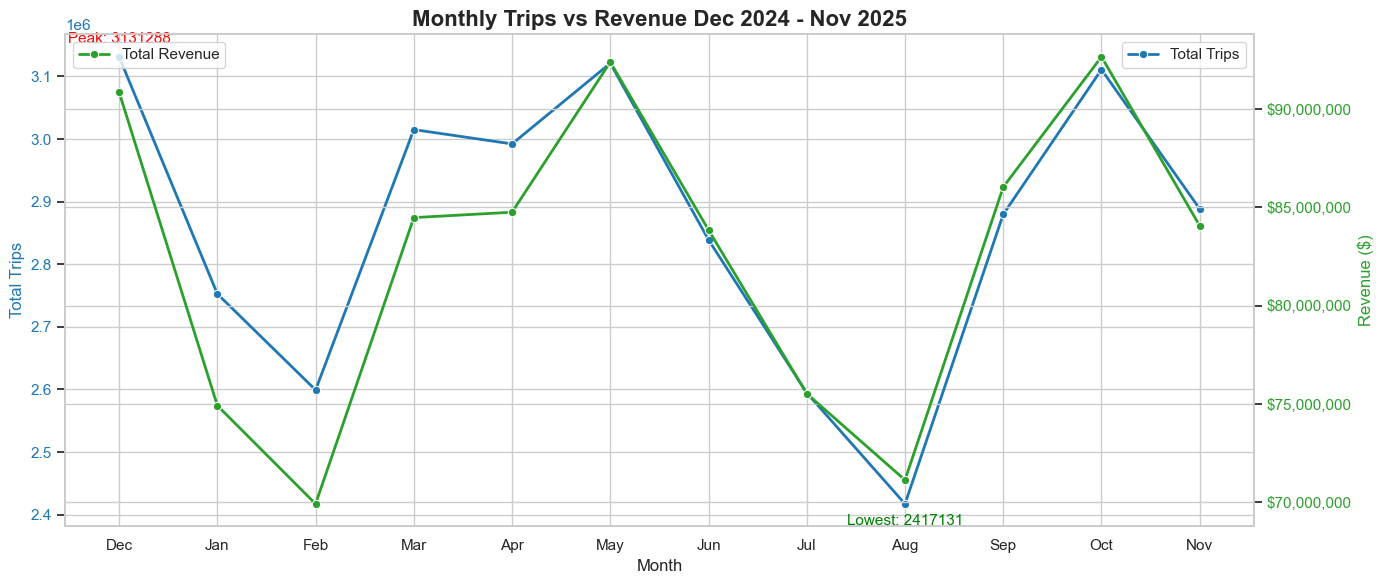

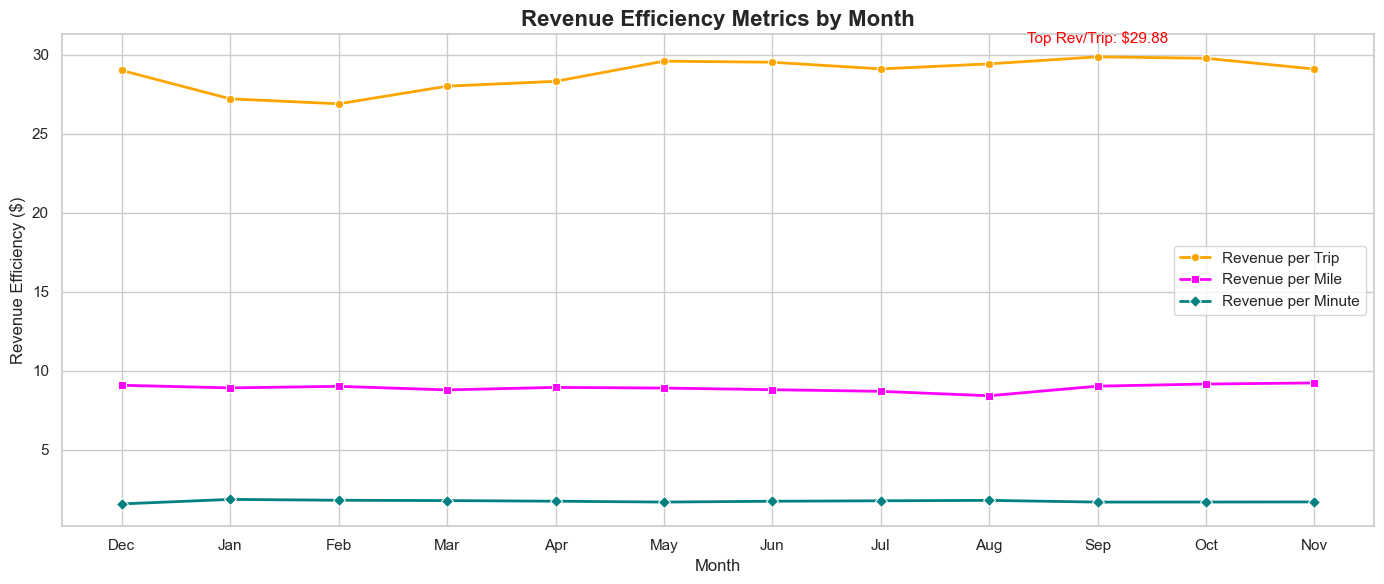

Month-over-Month Changes (%):


,month_str,trips_mom_pct,revenue_mom_pct,rev_per_trip_mom_pct
0,Dec,NaN,NaN,NaN
1,Jan,-12.09,-17.54,-6.19
2,Feb,-5.58,-6.67,-1.16
3,Mar,16.00,20.82,4.15
4,Apr,-0.76,0.33,1.09
5,May,4.31,9.01,4.51
6,Jun,-9.04,-9.25,-0.23
7,Jul,-8.61,-9.92,-1.43
8,Aug,-6.83,-5.81,1.10
9,Sep,19.14,20.94,1.52


In [189]:
# Setting up the Styles first
sns.set_style('whitegrid')
plt.rcParams.update({'font.size':12, 'figure.figsize':(14,6)})
# Trips vs Revenue Dual-Axis Chart
fig, ax1 = plt.subplots()
color_trips = 'tab:blue'
color_revenue = 'tab:green'

# Plotting Total Trips Here
sns.lineplot(
    data=m,
    x='month_str',
    y='total_trips',
    marker='o',
    linewidth=2,
    label='Total Trips',
    ax=ax1,
    color=color_trips
)
ax1.set_ylabel('Total Trips',color=color_trips)
ax1.tick_params(axis='y', labelcolor=color_trips)
ax1.set_xlabel('Month')
# Annotating peak and lowe demand months
peak_trips = m.loc[m['total_trips'].idxmax()]
low_trips = m.loc[m['total_trips'].idxmin()]

ax1.annotate(f'Peak: {peak_trips['total_trips']}', xy=(peak_trips['month_str'], peak_trips['total_trips']),
            xytext=(0,10), textcoords='offset points', ha='center', color='red', fontsize=11)
ax1.annotate(f'Lowest: {low_trips['total_trips']}', xy=(low_trips['month_str'], low_trips['total_trips']),
            xytext=(0,-15), textcoords='offset points', ha='center', color='green', fontsize=11)

ax2 = ax1.twinx()
sns.lineplot(
    data=m,
    x='month_str',
    y='total_revenue',
    marker='o',
    linewidth=2,
    label='Total Revenue',
    ax=ax2,
    color=color_revenue
)
ax2.set_ylabel('Revenue ($)', color=color_revenue)
ax2.tick_params(axis='y', labelcolor=color_revenue)
ax2.yaxis.set_major_formatter('${x:,.0f}')



# Highlight months contributing disproportionately to revenue
high_rev_months = m[m['pct_revenue'] > m['pct_trips'] + 2]
for idx, row in high_rev_months.iterrows():
    ax2.annotate(f"High Rev Share", xy=(row['month_str'], row['total_revenue']),
                 xytext=(0,15), textcoords='offset points', ha='center', color='darkgreen', fontsize=10)

plt.title('Monthly Trips vs Revenue Dec 2024 - Nov 2025', fontsize=16, weight='bold')
fig.tight_layout()
plt.show()


# Revenue per Trip and Efficiency Metrics
fig, ax = plt.subplots()
sns.lineplot(data=m, x='month_str', y='revenue_per_trip', marker='o', color='orange', linewidth=2, label='Revenue per Trip')
sns.lineplot(data=m, x='month_str', y='revenue_per_mile', marker='s', color='magenta', linewidth=2, label='Revenue per Mile')
sns.lineplot(data=m, x='month_str', y='revenue_per_min', marker='D', color='teal', linewidth=2, label='Revenue per Minute')

# Highlight best efficiency month
best_eff = m['revenue_per_trip'].idxmax()
ax.annotate(f"Top Rev/Trip: ${m.loc[best_eff, 'revenue_per_trip']:.2f}", 
            xy=(m.loc[best_eff, 'month_str'], m.loc[best_eff, 'revenue_per_trip']),
            xytext=(0,10), textcoords='offset points', ha='center', color='red', fontsize=11)

plt.title('Revenue Efficiency Metrics by Month', fontsize=16, weight='bold')
plt.xlabel('Month')
plt.ylabel('Revenue Efficiency ($)')
plt.legend()
plt.tight_layout()
plt.show()

# MoM % Change Table 
print("Month-over-Month Changes (%):")
display(m[['month_str', 'trips_mom_pct', 'revenue_mom_pct', 'rev_per_trip_mom_pct']].round(2))

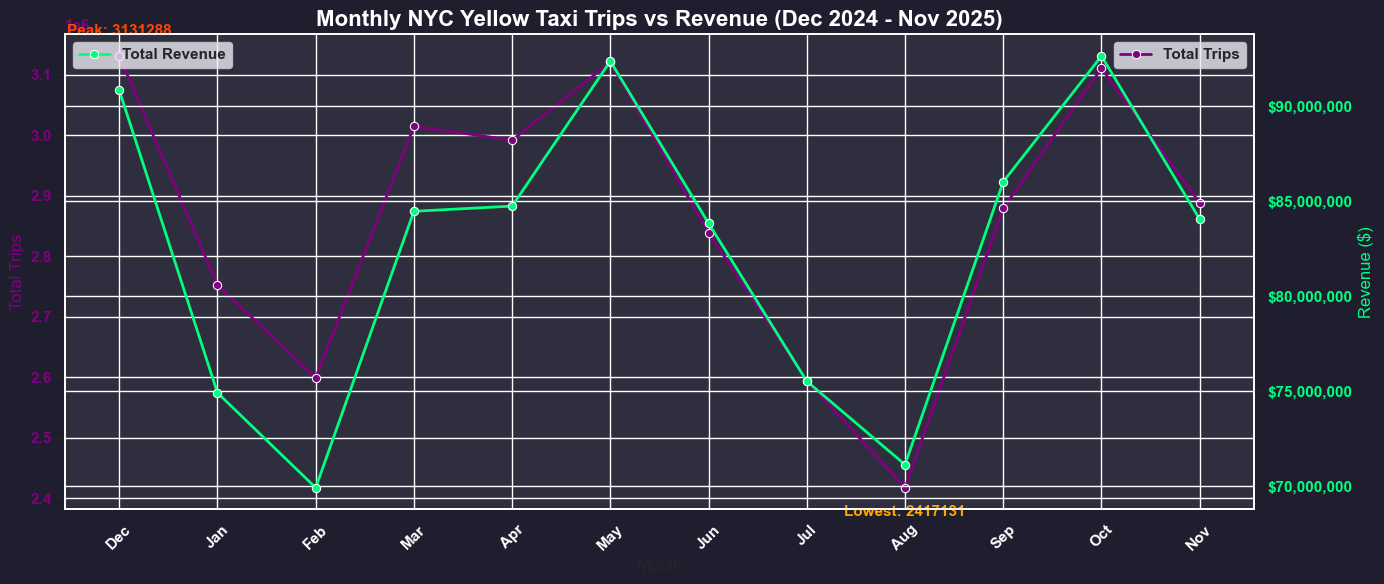

In [194]:
# Trips vs Revenue Chart
import matplotlib.pyplot as plt
import seaborn as sns

# Dark style
sns.set_style("darkgrid")
plt.rcParams.update({'font.size':12, 'figure.figsize':(14,6), 'font.weight':'bold'})

fig, ax1 = plt.subplots()
fig.patch.set_facecolor('#1e1e2f') 
ax1.set_facecolor('#2e2e3e')    

color_trips = 'purple'   
color_revenue = '#00ff7f'

# Plotting Total Trips
sns.lineplot(
    data=m,
    x='month_str',
    y='total_trips',
    marker='o',
    linewidth=2,
    label='Total Trips',
    ax=ax1,
    color=color_trips
)
ax1.set_ylabel('Total Trips', color=color_trips)
ax1.set_xlabel('Month')
ax1.tick_params(axis='y', labelcolor=color_trips)
ax1.tick_params(axis='x', rotation=45, labelsize=11, labelcolor='white')

# Annotate peak and low trips
peak_trips = m.loc[m['total_trips'].idxmax()]
low_trips = m.loc[m['total_trips'].idxmin()]

ax1.annotate(f'Peak: {peak_trips["total_trips"]}', 
             xy=(peak_trips['month_str'], peak_trips['total_trips']),
             xytext=(0,15), textcoords='offset points', ha='center', color='#ff4500', fontsize=11)
ax1.annotate(f'Lowest: {low_trips["total_trips"]}', 
             xy=(low_trips['month_str'], low_trips['total_trips']),
             xytext=(0,-20), textcoords='offset points', ha='center', color='#ffa500', fontsize=11)

# Plot Total Revenue on secondary axis
ax2 = ax1.twinx()
sns.lineplot(
    data=m,
    x='month_str',
    y='total_revenue',
    marker='o',
    linewidth=2,
    label='Total Revenue',
    ax=ax2,
    color=color_revenue
)
ax2.set_ylabel('Revenue ($)', color=color_revenue)
ax2.tick_params(axis='y', labelcolor=color_revenue)
ax2.yaxis.set_major_formatter('${x:,.0f}')

# Highlight months contributing disproportionately to revenue
high_rev_months = m[m['pct_revenue'] > m['pct_trips'] + 2]
for idx, row in high_rev_months.iterrows():
    ax2.annotate(f"High Rev Share", xy=(row['month_str'], row['total_revenue']),
                 xytext=(0,15), textcoords='offset points', ha='center', color='#7fff00', fontsize=10)

plt.title('Monthly NYC Yellow Taxi Trips vs Revenue (Dec 2024 - Nov 2025)',
          fontsize=16, weight='bold', color='white')
plt.tight_layout()
plt.show()


# Documentation:
December peaks in trips (3.13 Million Dollors, 9.1% of annual) while August is lowest (2.42 Million Dollors, 7.0%).
October generates the highest revenue (92.65 Million Dollors, 9.35% of annual), exceeding December despite fewer trips, reflecting superior fare efficiency.
Revenue per trip peaks in May and September (~29.60-29.88 Dollors), underscoring periods of high fare yield. Month-over-Month trends highligh March and September as growth hotspots (+16-19% trips, +21% revenue), While February and August are seasonal troughts.
These insights pinpoints peak demand, revenue concentration, and fare efficiency opportunities, guding strategic fleet allocation and pricing optimization.

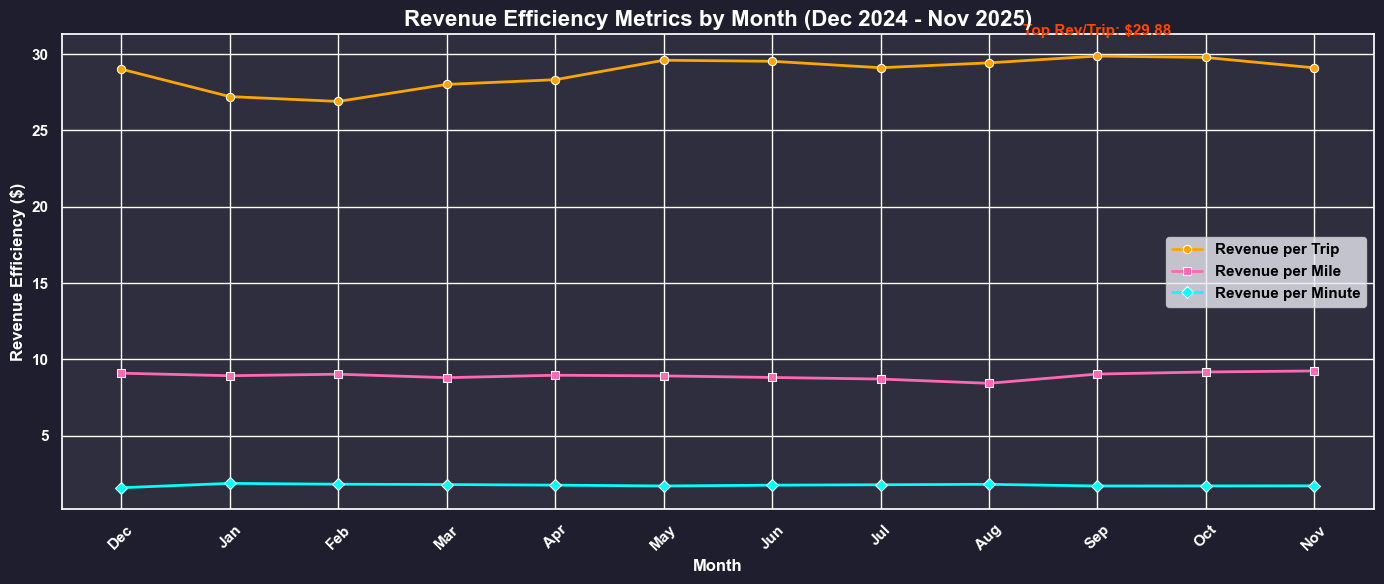

In [198]:
# ----- Dark Theme: Revenue Efficiency Metrics -----
fig, ax = plt.subplots()
fig.patch.set_facecolor('#1e1e2f')  # Dark figure background
ax.set_facecolor('#2e2e3e')         # Dark plot area

# Define colors for lines
color_rev_trip = '#ffa500'   # orange
color_rev_mile = '#ff69b4'   # pink
color_rev_min = '#00ffff'    # cyan

# Plot Revenue per Trip, per Mile, per Minute
sns.lineplot(data=m, x='month_str', y='revenue_per_trip', marker='o', linewidth=2, color=color_rev_trip, label='Revenue per Trip', ax=ax)
sns.lineplot(data=m, x='month_str', y='revenue_per_mile', marker='s', linewidth=2, color=color_rev_mile, label='Revenue per Mile', ax=ax)
sns.lineplot(data=m, x='month_str', y='revenue_per_min', marker='D', linewidth=2, color=color_rev_min, label='Revenue per Minute', ax=ax)

# Highlight the month with highest Revenue per Trip
best_eff = m['revenue_per_trip'].idxmax()
ax.annotate(f"Top Rev/Trip: ${m.loc[best_eff, 'revenue_per_trip']:.2f}", 
            xy=(m.loc[best_eff, 'month_str'], m.loc[best_eff, 'revenue_per_trip']),
            xytext=(0,15), textcoords='offset points', ha='center', color='#ff4500', fontsize=11, fontweight='bold')

# Axis labels and ticks
ax.set_xlabel('Month', fontsize=12, fontweight='bold', color='white')
ax.set_ylabel('Revenue Efficiency ($)', fontsize=12, fontweight='bold', color='white')
ax.tick_params(axis='x', rotation=45, labelsize=11, labelcolor='white')
ax.tick_params(axis='y', labelcolor='white')

# Title
plt.title('Revenue Efficiency Metrics by Month (Dec 2024 - Nov 2025)',
          fontsize=16, weight='bold', color='white')

# Legend
legend = ax.legend()
for text in legend.get_texts():
    text.set_color('black')  # Legend text in white

plt.tight_layout()
plt.show()


# Documentation:
September leads in revenue per trip (29.88 Dollors), November maximizes revenue per mile (9.23 Dollors), and January peaks in revenue per minute ($1.87), highlighting subtle operational efficiency shifts across the year.
While monthly variations are modest, May-September show sustained fare yield per trip, and winter months emphasize per-minute and per-mile efficiency.
Month-over-Month trends reeal strategic peaks and troughs, indicating periods where driver productivity and fare efficiency diverge from raw trip volume, offering actionable insights for fleet deployment and dynamic pricing optimization.

## Final Report

This notebook focused on understanding trip demand patterns across different time dimensions, including daily, weekly, monthly, and hourly trends. After standardizing date formats and extracting relevant time-based features, the dataset was aggregated to reflect actual recorded operational days. The analysis revealed clear temporal structures in demand, including weekday versus weekend differences and distinct hourly peak periods corresponding to commuter behavior. Monthly variations further suggested seasonal or event-driven fluctuations. These findings confirm that demand follows predictable time-based cycles rather than occurring randomly. The results provide a strong foundation for forecasting, capacity planning, and dynamic pricing strategies, while also preparing the dataset for future machine learning applications.